In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
from faraway.datasets import galapagos

In [2]:
# Load the data
data = galapagos.load()

In [3]:
data.head()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Baltra to Wolf
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    30 non-null     int64  
 1   Area       30 non-null     float64
 2   Elevation  30 non-null     int64  
 3   Nearest    30 non-null     float64
 4   Scruz      30 non-null     float64
 5   Adjacent   30 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.6+ KB


In [5]:
# Define predictors and response variable
X = data[['Area', 'Elevation', 'Nearest']]  # Example predictors
y = data['Species']  # Response (binary outcome: presence/absence)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print("X_train dimensions:", X_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_train dimensions:", y_train.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (24, 3)
X_test dimensions: (6, 3)
y_train dimensions: (24,)
y_test dimensions: (6,)


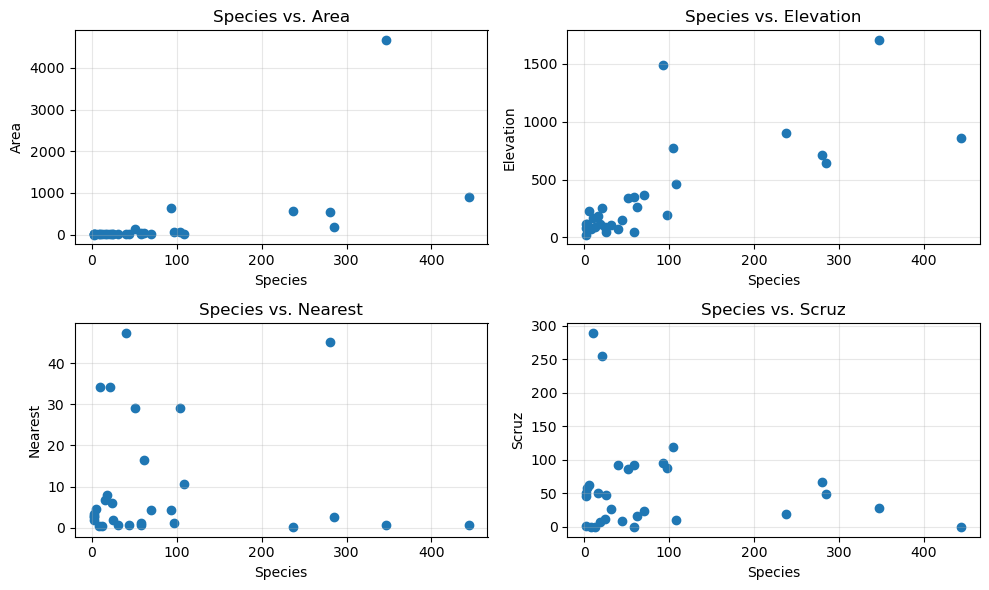

In [8]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot Species vs. Area
axes[0, 0].scatter(data['Species'], data['Area'])
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Area')
axes[0, 0].set_title('Species vs. Area')
axes[0,0].grid(alpha=0.3)

# Plot Species vs. Elevation
axes[0, 1].scatter(data['Species'], data['Elevation'])
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Elevation')
axes[0, 1].set_title('Species vs. Elevation')
axes[0, 1].grid(alpha=0.3)


# Plot Species vs. Nearest
axes[1, 0].scatter(data['Species'], data['Nearest'])
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Nearest')
axes[1, 0].set_title('Species vs. Nearest')
axes[1,0].grid(alpha=0.3)


# Plot Species vs. Scruz
axes[1, 1].scatter(data['Species'], data['Scruz'])
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Scruz')
axes[1, 1].set_title('Species vs. Scruz')
axes[1,1].grid(alpha=0.3)


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### 1. Define Binary

In [9]:
# Define predictors and response variable
X = data[['Area', 'Elevation', 'Adjacent']]  # Example predictors

In [10]:
# Calculate the median of the Nearest column from the predictor already defined
median_nearest = data['Nearest'].median()

In [11]:
# Create the Nearest_Binary column
data['Nearest_Binary'] = (data['Nearest'] > median_nearest).astype(int)
y = data['Nearest_Binary']

In [12]:
# Split data into training and testing sets again with the new y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
data[['Nearest', 'Nearest_Binary']].head(8)

,Nearest,Nearest_Binary
Baltra,0.6,0
Bartolome,0.6,0
Caldwell,2.8,0
Champion,1.9,0
Coamano,1.9,0
Daphne.Major,8.0,1
Daphne.Minor,6.0,1
Darwin,34.1,1


In [14]:
# Count the occurrences of 0 and 1
binary_counts = y.value_counts()
binary_counts

Nearest_Binary
0    15
1    15
Name: count, dtype: int64

Interpretation: The dataset contains 30 records with six variables. The target variable, Species, represents a count that will later be transformed into a binary classification target. Predictors Area, Elevation, and Nearest are selected as independent variables. The data is successfully split into training (24 observations) and testing (6 observations) subsets.

### 2. Scale the Predictors

In [15]:
# Scale the predictors
scaler = StandardScaler()

# Transform training and testing predictors
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Get dimensions
print("Dimensions of X_train_scaled:", X_train_scaled.shape)
print("Dimensions of X_test_scaled:", X_test_scaled.shape)

Dimensions of X_train_scaled: (24, 3)
Dimensions of X_test_scaled: (6, 3)


Interpretation: The predictors are scaled to standardize their range for better performance of logistic regression. The scaled training and testing datasets maintain the same dimensions as the original splits, ensuring no data is lost during preprocessing.

### 3. Fit the Logistic Regression model

In [16]:
# Fit logistic regression model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Output coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.36853881]
Coefficients: [[-0.54318024  0.75656123  0.05697516]]


### 4. Make prediction

In [17]:
# Predict probabilities and classes
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred_class = model.predict(X_test_scaled)

# Display predictions
print("Predicted Probabilities:", y_pred_prob[:5])
print("Predicted Classes:", y_pred_class[:5])

Predicted Probabilities: [0.54407974 0.00074678 0.63293308 0.4764621  0.50250907]
Predicted Classes: [1 0 1 0 1]


### 5. Evaluate the model

In [18]:
# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Accuracy Score:", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

Confusion Matrix:
 [[1 4]
 [1 0]]
Accuracy Score: 0.16666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.25      0.10      0.14         6
weighted avg       0.42      0.17      0.24         6



### 6. Check Assumptions

In [19]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print(vif)

    Variable       VIF
0       Area  2.814390
1  Elevation  4.149119
2   Adjacent  1.891136


When applying binary logistic regression to the Galapagos Islands dataset, key challenges may arise in variable selection, scaling, and assumption validation. Choosing predictors like Area, Elevation, and Nearest is critical, as their relevance directly impacts the model's interpretability and performance. A potential issue is the inclusion of irrelevant predictors, which may lead to overfitting or inflated multicollinearity. This was mitigated by calculating Variance Inflation Factor (VIF), confirming that multicollinearity is not severe in this dataset.

Scaling the predictors ensures that the coefficients are on the same scale, improving convergence and interpretability, but introduces additional preprocessing steps that must be consistently applied to training and testing sets. The binary transformation of the response variable (Species) highlights a decision-making point; you must ensure the response variable aligns with the research question.

For instance, defining species presence as Species > 0 provides a clear and biologically meaningful target. Understanding these steps and their implications is essential for robust and generalizable logistic regression models.